<a href="https://colab.research.google.com/github/shinzokuro/Cnn/blob/alex/fasterrcnn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 58658, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 58658 (delta 233), reused 359 (delta 219), pack-reused 58274
Receiving objects: 100% (58658/58658), 573.36 MiB | 32.36 MiB/s, done.
Resolving deltas: 100% (40711/40711), done.


In [3]:
cd /content/models/research

/content/models/research


In [4]:
!protoc object_detection/protos/*.proto --python_out=.

In [5]:
!git clone https://github.com/cocodataset/cocoapi.git


Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 23.59 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [6]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [7]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [8]:
cp -r pycocotools /content/models/research

In [9]:
cd ..

/content/models/research/cocoapi


In [10]:
cd ..

/content/models/research


In [11]:
cp object_detection/packages/tf2/setup.py .

In [12]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.7MB 12.0MB/s 
     |████████████████████████████████| 358kB 46.4MB/s 
     |████████████████████████████████| 1.6MB 47.1MB/s 
     |████████████████████████████████| 829kB 43.7MB/s 
     |████████████████████████████████| 153kB 53.1MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 
     |████████████████████████████████| 2.3MB 41.3MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 645kB 41.5MB/s 
     |████████████████████████████████| 37.2MB 63kB/s 
     |████████████████████████████████| 215kB 56.9MB/s 
     |████████████████████████████████| 686kB 35.4MB/s 
     |████████████████████████████████| 102kB 14.0MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 1.2MB 33.3MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1658497 sha256=e2a499eaf92d24713a3cc116

In [13]:
!python object_detection/builders/model_builder_tf2_test.py

2021-07-12 10:05:49.299335: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-07-12 10:05:51.488047: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-12 10:05:51.548118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-12 10:05:51.548708: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-12 10:05:51.548752: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfull

In [14]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
!unzip "/content/gdrive/MyDrive/ObjectDetection/mymodels/FRcnn2/dataset.zip" -d "/content/data"

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/content/OID/Dataset/train/Car/e6edf93db090e282.jpg  
  inflating: /content/data/content/OID/Dataset/train/Car/bfbddbb88220a113.jpg  
  inflating: /content/data/content/OID/Dataset/train/Car/9453ba85fafd769c.jpg  
  inflating: /content/data/content/OID/Dataset/train/Car/d67b0b10c47e97e6.xml  
  inflating: /content/data/content/OID/Dataset/train/Car/e36b53fb0af083a0.jpg  
  inflating: /content/data/content/OID/Dataset/train/Car/ec76e6fc84c98d69.xml  
  inflating: /content/data/content/OID/Dataset/train/Car/fa6f1953c2c4a096.jpg  
  inflating: /content/data/content/OID/Dataset/train/Car/e8417d4fbb839021.xml  
  inflating: /content/data/content/OID/Dataset/train/Car/000d6d9747068bbb.xml  
  inflating: /content/data/content/OID/Dataset/train/Car/3e1fa5bd230f8d18.xml  
  inflating: /content/data/content/OID/Dataset/train/Car/4cd3322097559dd8.jpg  
  inflating: /content/data/content/OID/Dataset/train/Car/3e614650a90f

In [16]:
!unzip "/content/gdrive/MyDrive/ObjectDetection/mymodels/structure.zip" -d "/content/data"

Archive:  /content/gdrive/MyDrive/ObjectDetection/mymodels/structure.zip
   creating: /content/data/content/training_demo/
   creating: /content/data/content/training_demo/pre-trained-models/
   creating: /content/data/content/training_demo/annotations/
   creating: /content/data/content/training_demo/exported-models/
   creating: /content/data/content/training_demo/exported-models/.ipynb_checkpoints/
   creating: /content/data/content/training_demo/exported-models/my_models/
   creating: /content/data/content/training_demo/models/
   creating: /content/data/content/training_demo/models/.ipynb_checkpoints/
   creating: /content/data/content/training_demo/models/faster_rcnn_resnet101_v1_640x640_coco17_tpu/
   creating: /content/data/content/training_demo/.ipynb_checkpoints/
   creating: /content/data/content/training_demo/images/


cp: -r not specified; omitting directory '/content/gdrive/MyDrive/ObjectDetection/Scripts'


In [18]:
cd '/content/scripts/preprocessing'

/content/scripts/preprocessing


In [19]:
!python partition_dataset.py -x -i /content/data/content/OID/Dataset/train/Car -o /content/training_demo/images -r 0.1

partition_dataset.py:35: DeprecationWarning: Flags not at the start of the expression '([a-zA-Z0-9\\s_\\\\.\\-\\' (truncated)
  if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png)$', f)]


In [20]:
# Create train data:
!python generate_tfrecord.py -x /content/training_demo/images/train -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/training_demo/images/test -l /content/training_demo/annotations/label_map.pbtxt -o /content/training_demo/annotations/test.record

Successfully created the TFRecord file: /content/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/training_demo/annotations/test.record


In [21]:
cd /content/training_demo/pre-trained-models 

/content/training_demo/pre-trained-models


In [22]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

--2021-07-12 10:09:22--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.199.128, 2607:f8b0:400e:c02::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.199.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353643040 (337M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet1 100%[===================>] 337.26M   140MB/s    in 2.4s    

2021-07-12 10:09:25 (140 MB/s) - ‘faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz’ saved [353643040/353643040]



In [23]:
!tar -xvf faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz

faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [25]:
cd ..

/content/training_demo


In [26]:
ls

annotations/         export_tflite_graph_tf2.py  models/
exported-models/     images/                     pre-trained-models/
exporter_main_v2.py  model_main_tf2.py


In [28]:
!python model_main_tf2.py --model_dir=/content/training_demo/models/my_faster_rcnn_resnet101_v1_640x640_coco17_tpu-8 --pipeline_config_path=/content/training_demo/models/my_faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/pipeline.config

2021-07-12 10:17:39.170602: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-12 10:17:41.512659: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-12 10:17:41.547238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-12 10:17:41.547854: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-12 10:17:41.547898: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-12 10:17:41.550639: I tensorflow/stream_executor/platform/default

In [29]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/training_demo/models/my_faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/pipeline.config --trained_checkpoint_dir /content/training_demo/models/my_faster_rcnn_resnet101_v1_640x640_coco17_tpu-8 --output_directory /content/training_demo/exported-models/my_model

2021-07-12 13:06:33.847187: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-12 13:06:39.650515: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-12 13:06:39.700316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-07-12 13:06:39.700900: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-07-12 13:06:39.700980: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-07-12 13:06:39.707584: I tensorflow/stream_executor/platform/default

loading model
Done took12.908095836639404 seconds
Running inference for /content/training_demo/images/test/003fc062a3dda4ac.jpg... Done


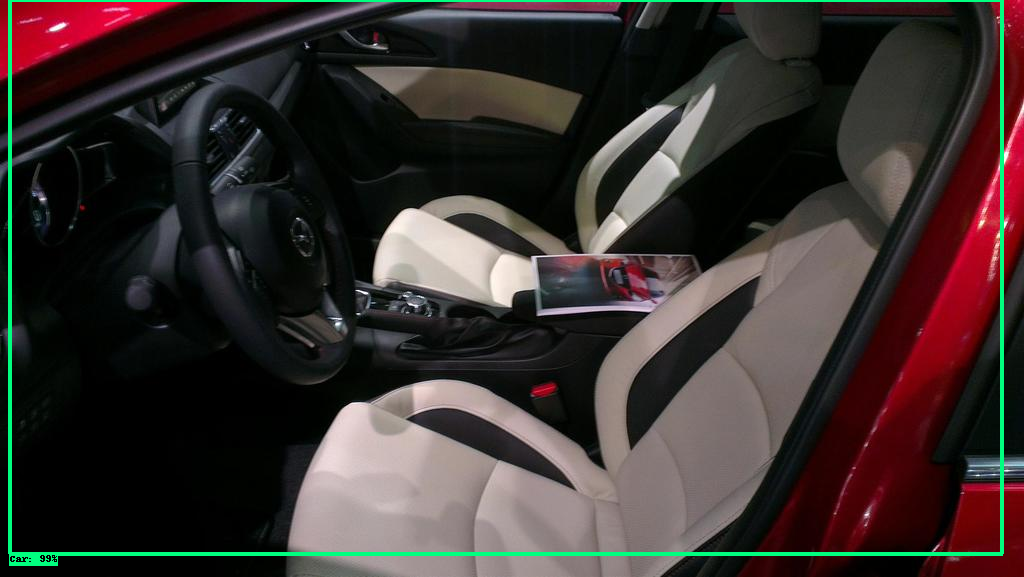

In [30]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
IMAGE_PATHS = '/content/training_demo/images/test/003fc062a3dda4ac.jpg'
PATH_TO_MODEL_DIR = '/content/training_demo/exported-models/my_model'
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'
MINF_CONF_THRESH = float(0.60)
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"
print('loading model')
start_time = time.time()
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print('Done took{} seconds'.format(elapsed_time))

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name= True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis = 0)
    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_expanded)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
##input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
detections['num_detections'] = num_detections

    # detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
  image_np_with_detections,
  detections['detection_boxes'],
  detections['detection_classes'],
  detections['detection_scores'],
  category_index,
  use_normalized_coordinates=True,
  max_boxes_to_draw=200,
  min_score_thresh=.30,
  agnostic_mode=False)

    
print('Done')
cv2_imshow(image_np_with_detections)

# sphinx_gallery_thumbnail_number = 2


In [34]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
IMAGE_PATHS = '/content/training_demo/images/test/000998c7ed279358.jpg'
PATH_TO_MODEL_DIR = '/content/training_demo/exported-models/my_model'
PATH_TO_LABELS = '/content/training_demo/annotations/label_map.pbtxt'
MINF_CONF_THRESH = float(0.60)
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"
print('loading model')
start_time = time.time()
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print('Done took{} seconds'.format(elapsed_time))

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name= True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


cap = cv2.VideoCapture('/content/drive/MyDrive/ObjectDetection/Test_Videos/video3.mp4')

if cap.isOpened() == False:
    print('Nulz')

fps = int(cap.get(cv2.CAP_PROP_FPS))
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))   # float `width`
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # float `height`


fourcc = cv2.VideoWriter_fourcc(*'XVID')

out = cv2.VideoWriter(os.path.join('/content/drive/MyDrive/ObjectDetection/mymodels/FRcnn2/op','video3.mp4'),fourcc,fps,(width,height),True)




while(cap.isOpened()):


    ret, image_np = cap.read()
    

    if not ret:
      print('Reached the end of the video!')
      break
    image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)
    image_expanded = np.expand_dims(image_rgb, axis = 0)


    input_tensor = tf.convert_to_tensor(image_expanded)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    ##input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)


    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=200,
            min_score_thresh=.25,
            agnostic_mode=False)
        
    ##cv2_imshow(image_np)
    out.write(image_np)
        

cap.release()
out.release()
#cv2.destroyAllWindows()
print('done')

loading model
Done took12.826217651367188 seconds
Reached the end of the video!
done


In [35]:
!zip -r /content/drive/MyDrive/ObjectDetection/mymodels/FRcnn2 /content/training_demo

Streaming output truncated to the last 5000 lines.
  adding: content/training_demo/images/train/cad335bd4aa686da.xml (deflated 70%)
  adding: content/training_demo/images/train/e69e564512adfa8c.jpg (deflated 0%)
  adding: content/training_demo/images/train/542c36b0cf53b76e.xml (deflated 73%)
  adding: content/training_demo/images/train/da59e351bd041bea.jpg (deflated 0%)
  adding: content/training_demo/images/train/a21ef70a004df27a.jpg (deflated 1%)
  adding: content/training_demo/images/train/fd161821ac42621a.jpg (deflated 1%)
  adding: content/training_demo/images/train/335132d7828c548a.jpg (deflated 0%)
  adding: content/training_demo/images/train/27db2d2a2d8a8d8f.jpg (deflated 0%)
  adding: content/training_demo/images/train/ac35ecb103aef88d.xml (deflated 65%)
  adding: content/training_demo/images/train/646d14abb408a9a6.xml (deflated 48%)
  adding: content/training_demo/images/train/aeb5ff0f936aa953.xml (deflated 73%)
  adding: content/training_demo/images/train/c0b9855706f4765b.xm